An example of a simple neural network with 1 hidden layer in PyTorch

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 500
X,y=datasets.make_circles(n_samples=n_pts, random_state=123, noise = 0.1, factor=0.2) 
# factor: size of ineer circle compared to outer circle, noise is gaussian, noise = 0 is perfect circle

print(X[:10])
print(y[:10])

dataX = torch.Tensor(X)
dataY = torch.Tensor(y.reshape(n_pts,1))

[[ 0.69855363 -0.37828961]
 [-0.24842242  0.19107122]
 [-0.17875904  0.25369748]
 [-0.00730467 -0.25926669]
 [-0.15984414  0.26691592]
 [-0.80107169 -0.10865614]
 [ 1.00816914  0.20730929]
 [ 0.04397805 -0.28023607]
 [-0.08348537 -0.13811437]
 [-0.98892821 -0.0926102 ]]
[0 1 1 1 1 0 0 1 1 0]


In [3]:
def plot_scatter(X,y):
    item1 = plt.scatter(X[y==0,0], X[y==0,1], color = 'green', label = '0')
    item2 = plt.scatter(X[y==1,0], X[y==1,1], color = 'red', label = '1')
    plt.legend(handles = [item1, item2])

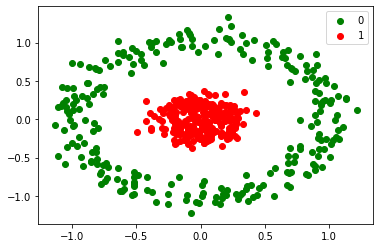

In [4]:
plot_scatter(X,y)

In [5]:
class Model(nn.Module):
    def __init__(self, input_layer, hidden_layer, output_layer):
        super().__init__()
        self.linear = nn.Linear(input_layer, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, output_layer)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, X):
        pred = self.forward(X)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [8]:
losses=[]
epochs = 200

for i in range(epochs):
    y_pred = model.forward(dataX)
    loss = loss_func(y_pred,dataY)
    if i%20==0:
        print("epochs: ", i, "loss: ", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs:  0 loss:  0.7148520350456238
epochs:  20 loss:  0.6800421476364136
epochs:  40 loss:  0.5330896377563477
epochs:  60 loss:  0.336764395236969
epochs:  80 loss:  0.1793317198753357
epochs:  100 loss:  0.07139110565185547
epochs:  120 loss:  0.04176514968276024
epochs:  140 loss:  0.030347511172294617
epochs:  160 loss:  0.02412603795528412
epochs:  180 loss:  0.020058397203683853


Text(0, 0.5, 'loss')

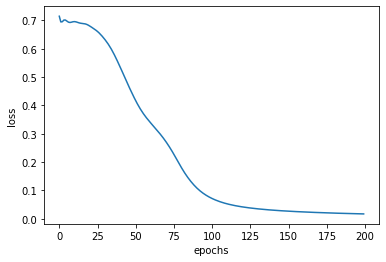

In [9]:
plt.plot(range(epochs), losses)
plt.xlabel("epochs")
plt.ylabel('loss')

In [10]:
def plot_decision_bound(X,y):
    X_span = np.linspace(min(X[:,0])-0.1, max(X[:,0])+0.1)
    y_span = np.linspace(min(X[:,1])-0.1, max(X[:,1])+0.1)
    x_grid, y_grid = np.meshgrid(X_span, y_span) # creates a cartesian grid that covers our entire dataset
    inp = torch.Tensor(np.c_[x_grid.ravel(), y_grid.ravel()]) #np.c_ for concatenation of two 1d array into 2d
    pred = model.forward(inp)
    p = pred.view(x_grid.shape).detach().numpy()

    plt.contourf(x_grid, y_grid, p)

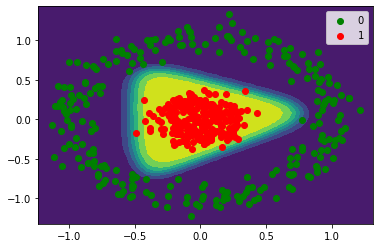

In [11]:
plot_decision_bound(X,y)
plot_scatter(X,y)

prediction of point 1 black is:  1
prediction of point 2 yellow is:  0


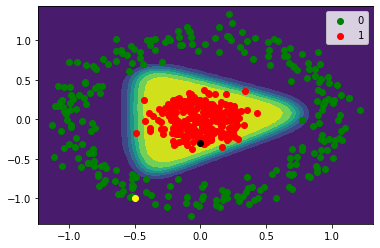

In [12]:
x1 = 0
y1 = -0.3

x2 = -0.5
y2 = -1

pt1 = torch.Tensor([x1,y1])
pt2 = torch.Tensor([x2,y2])

prediction1 = model.predict(pt1)
prediction2 = model.predict(pt2)



print("prediction of point 1 black is: ", prediction1)
print("prediction of point 2 yellow is: ", prediction2)

plot_decision_bound(X,y)
plot_scatter(X,y)
plt.plot(x1,y1, marker='o', color = 'black')
plt.plot(x2,y2, marker='o', color = 'yellow')